In [1]:
from eval import (
    load_eval_data,
    median_best_mae,
    median_final_mae,
    median_steps_to_convergence,
    median_steps_to_threshold,
    plot_best_mae_box,
    plot_best_mae_over_time,
    plot_final_mae_box,
    plot_mae_over_time,
    plot_steps_to_convergence_box,
    plot_steps_to_threshold_box,
)


In [2]:
rl = load_eval_data("bo_rl_opponent_evaluation")
bo = load_eval_data("bo_evaluation")


RL -> 9.0
BO -> 152.0


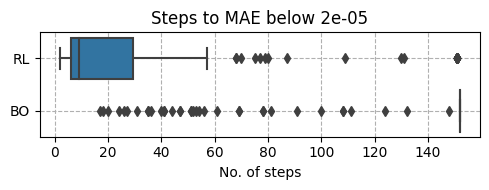

In [5]:
print(f"RL -> {median_steps_to_threshold(rl)}")
print(f"BO -> {median_steps_to_threshold(bo)}")

plot_steps_to_threshold_box({"RL": rl, "BO": bo})


RL -> 7.0
BO -> 32.0


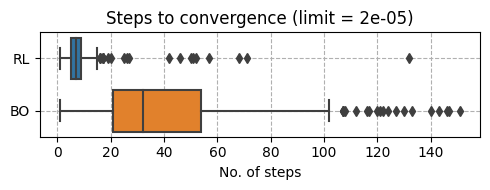

In [6]:
print(f"RL -> {median_steps_to_convergence(rl)}")
print(f"BO -> {median_steps_to_convergence(bo)}")

plot_steps_to_convergence_box({"RL": rl, "BO": bo})


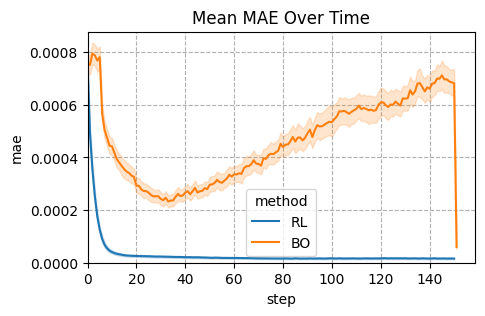

In [5]:
plot_mae_over_time({"RL": rl, "BO": bo})


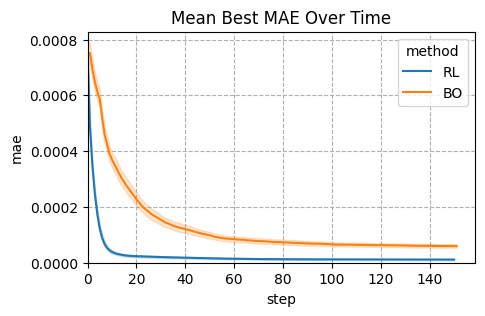

In [6]:
plot_best_mae_over_time({"RL": rl, "BO": bo})


RL -> 7.071090067256591e-06
BO -> 0.0005660077149514109


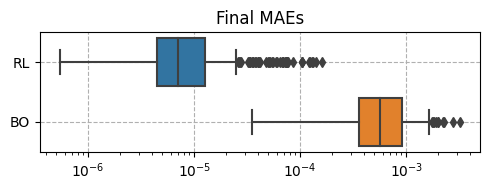

In [7]:
print(f"RL -> {median_final_mae(rl)}")
print(f"BO -> {median_final_mae(bo)}")

plot_final_mae_box({"RL": rl, "BO": bo})


RL -> 4.440665406946209e-06
BO -> 4.5300330384634435e-05


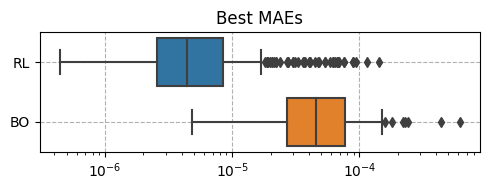

In [8]:
print(f"RL -> {median_best_mae(rl)}")
print(f"BO -> {median_best_mae(bo)}")

plot_best_mae_box({"RL": rl, "BO": bo})
